In [5]:
# CUMULATIVE INFECTION PRESSURE FROM AMSTERDAM

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib
import numpy as np

def create_spatial_4plots(data_per_municipality, title, legend_label):
    mapdf = gpd.read_file('Data/NL-geomap/gemeente_2018_v3.shp')
    mapdf = mapdf[mapdf["H2O"] == "NEE"]
    mapdf.sort_values("GM_NAAM", inplace=True)
    mapdf = mapdf.reset_index(drop=True)

    max_time = data_per_municipality.shape[0]
    max_val = np.max(data_per_municipality[max_time-1])

    fig, axs = plt.subplots(1, 4, figsize=(20, 8))
    fig.suptitle(title)

    mapdf.insert(0, 'DATA_QUARTER', data_per_municipality[int(max_time/4)])
    mapdf.insert(0, 'DATA_HALF', data_per_municipality[int(max_time/2)])
    mapdf.insert(0, 'DATA_3QUARTER', data_per_municipality[int(max_time*3/4)])
    mapdf.insert(0, 'DATA_MAXTIME', data_per_municipality[max_time-1])

    mapdf.plot(ax=axs[0], column="DATA_QUARTER", norm=matplotlib.colors.LogNorm(1,max_val))
    mapdf.plot(ax=axs[1], column="DATA_HALF", norm=matplotlib.colors.LogNorm(1,max_val))
    mapdf.plot(ax=axs[2], column="DATA_3QUARTER", norm=matplotlib.colors.LogNorm(1,max_val))
    mapdf.plot(ax=axs[3], column="DATA_MAXTIME", norm=matplotlib.colors.LogNorm(1,max_val))


    axs[0].set_title('t=' + str(int(max_time/4)))
    axs[1].set_title('t=' + str(int(max_time/2)))
    axs[2].set_title('t=' + str(int(max_time*3/4)))
    axs[3].set_title('t=' + str(int(max_time-1)))

    axs[0].axis('off')
    axs[1].axis('off')
    axs[2].axis('off')
    axs[3].axis('off')

    mappable = cm.ScalarMappable(
        norm=mcolors.Normalize(1, max_val))

    cb_ax = fig.add_axes([0.1, 0.1, 0.8, 0.02])

    cbar = fig.colorbar(mappable, cax=cb_ax, orientation='horizontal')
    cbar.set_label(legend_label)

    plt.tight_layout()
    plt.plot()

In [19]:
# DAILY PLOT FOR 1 WEEK

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib
import numpy as np

def create_spatial_7plots(data_per_municipality, title, legend_label):
    mapdf = gpd.read_file('Data/NL-geomap/gemeente_2018_v3.shp')
    mapdf = mapdf[mapdf["H2O"] == "NEE"]
    mapdf.sort_values("GM_NAAM", inplace=True)
    mapdf = mapdf.reset_index(drop=True)

    max_time = data_per_municipality.shape[0]
    max_val = np.max(data_per_municipality[max_time-1])

    fig, axs = plt.subplots(1, 7, figsize=(21, 5))
    fig.suptitle(title)

    for day in range(0, 7):
        day_num = day + 1
        mapdf.insert(0, 'DAY_' + str(day_num), data_per_municipality[day_num * 24 - 1])
        mapdf.plot(ax=axs[day], column='DAY_' + str(day_num), norm=matplotlib.colors.LogNorm(1, max_val))
        axs[day].set_title('Day ' + str(day_num))
        axs[day].axis('off')

    mappable = cm.ScalarMappable(
        norm=matplotlib.colors.LogNorm(1, max_val))

    cb_ax = fig.add_axes([0.1, 0.1, 0.8, 0.02])

    cbar = fig.colorbar(mappable, cax=cb_ax, orientation='horizontal')
    cbar.set_label(legend_label)

    plt.tight_layout()
    plt.plot()

C:\Users\Larsk\AppData\Local\Temp\ipykernel_6728\1150373992.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\Larsk\AppData\Local\Temp\ipykernel_6728\1150373992.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\Larsk\AppData\Local\Temp\ipykernel_6728\1150373992.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\Larsk\AppData\Local\Temp\ipykernel_6728\1150373992.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


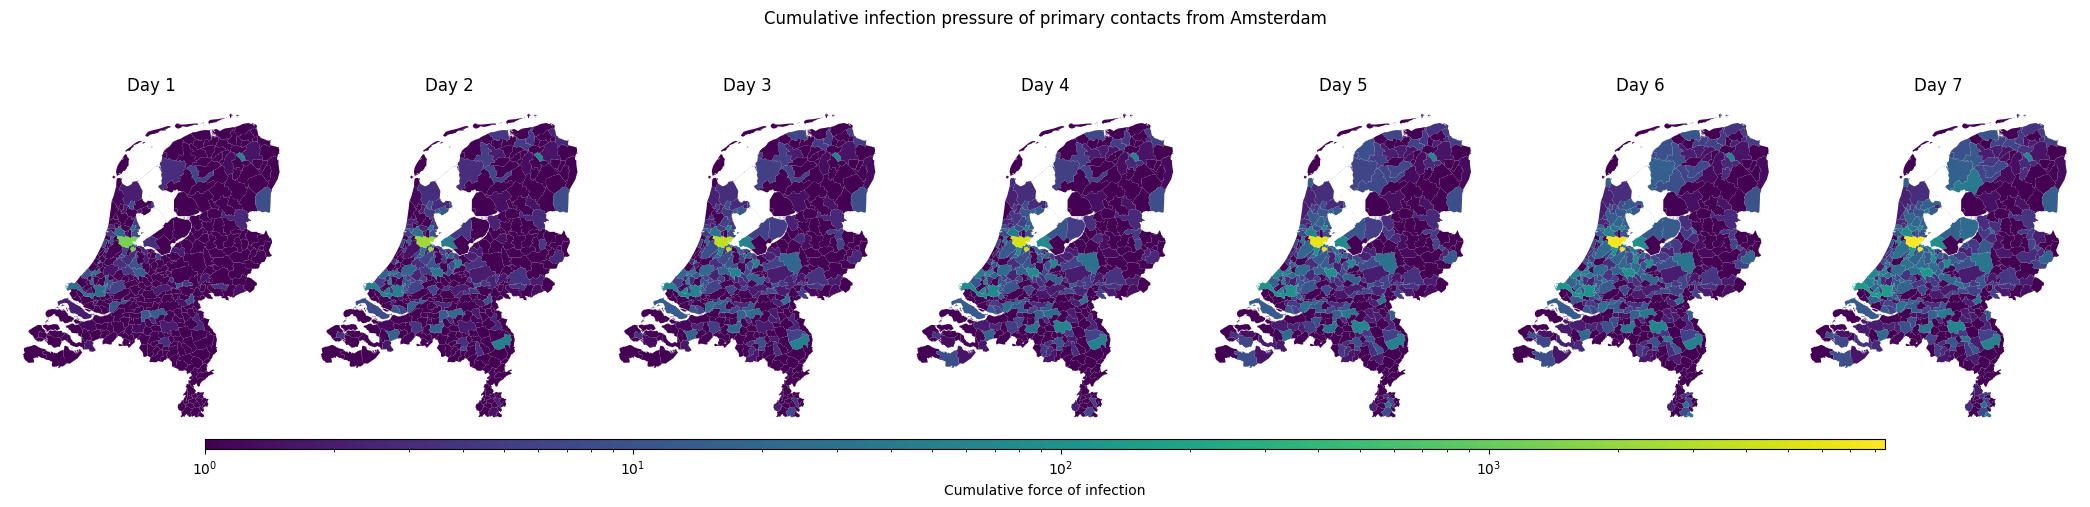

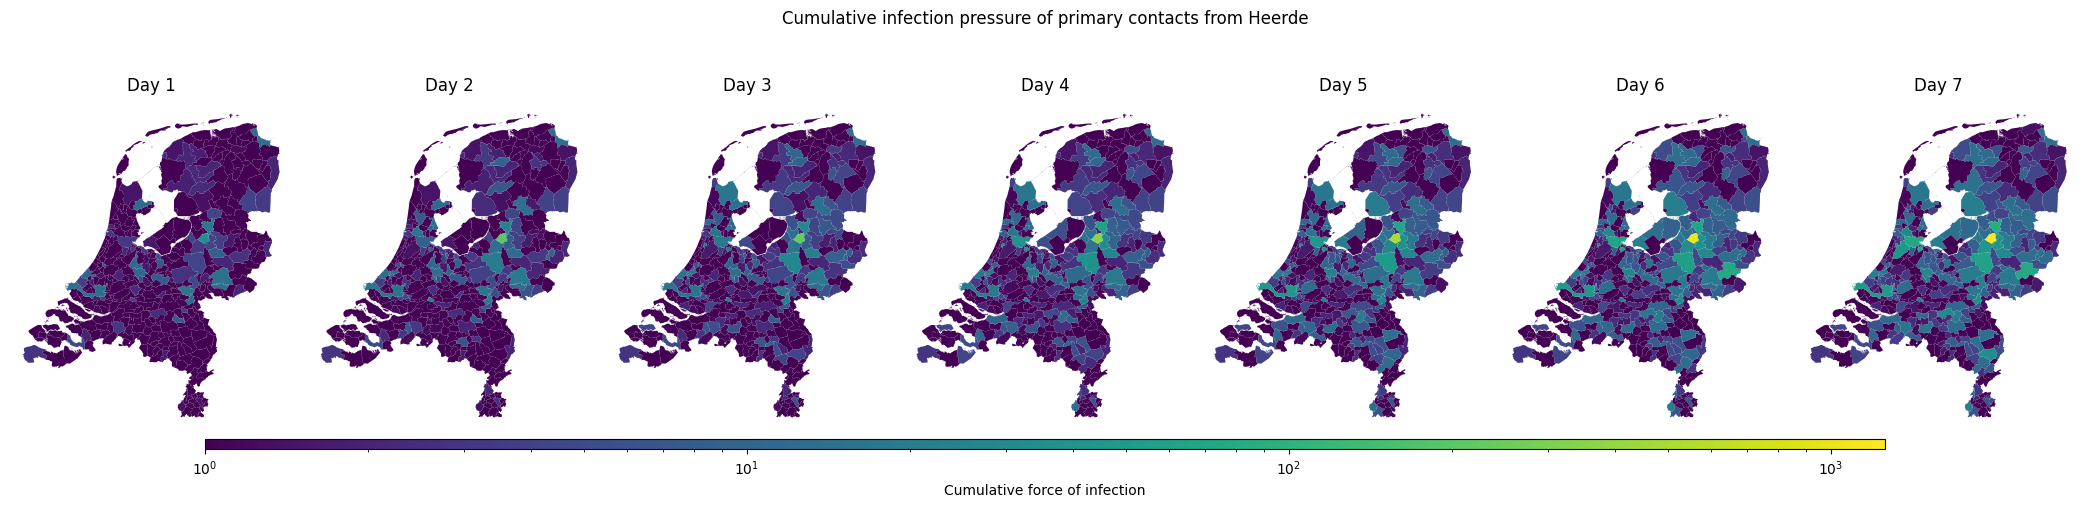

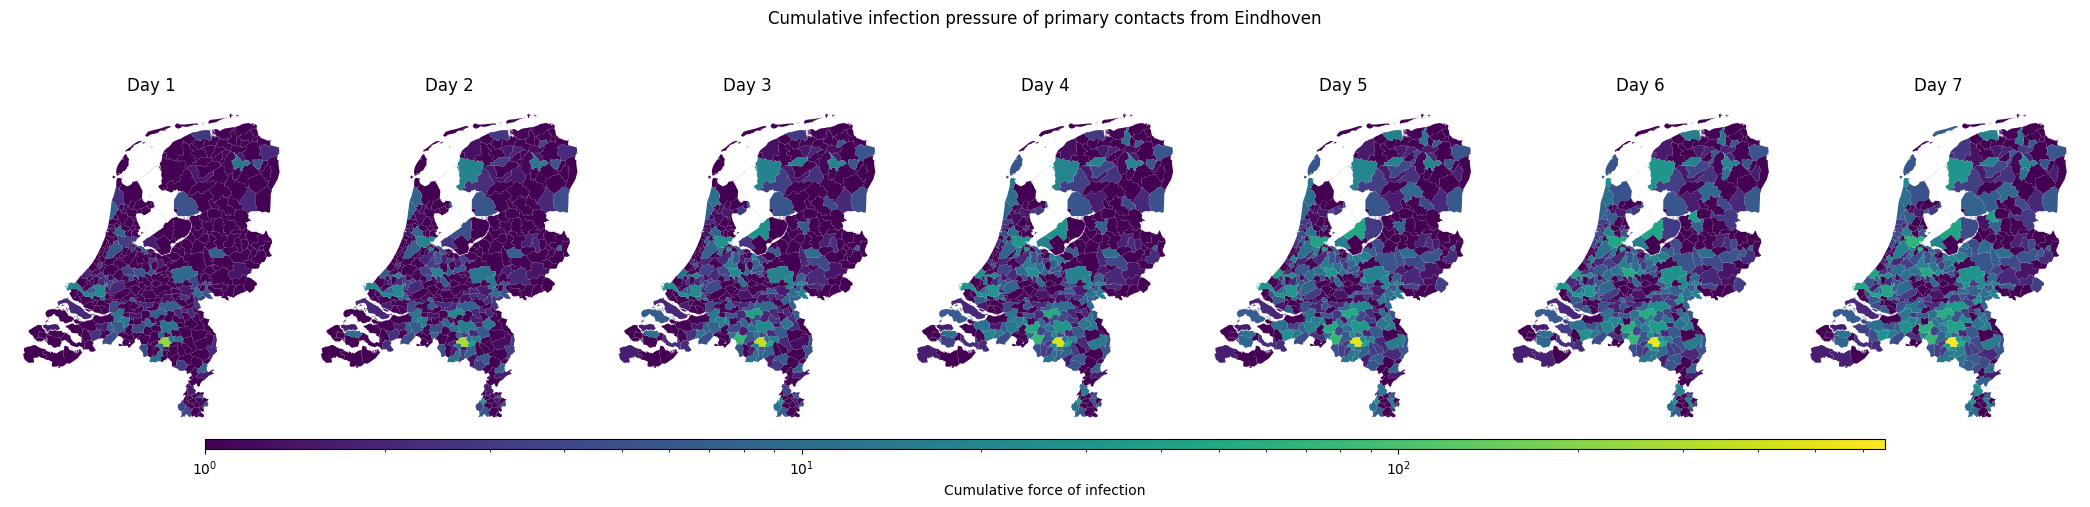

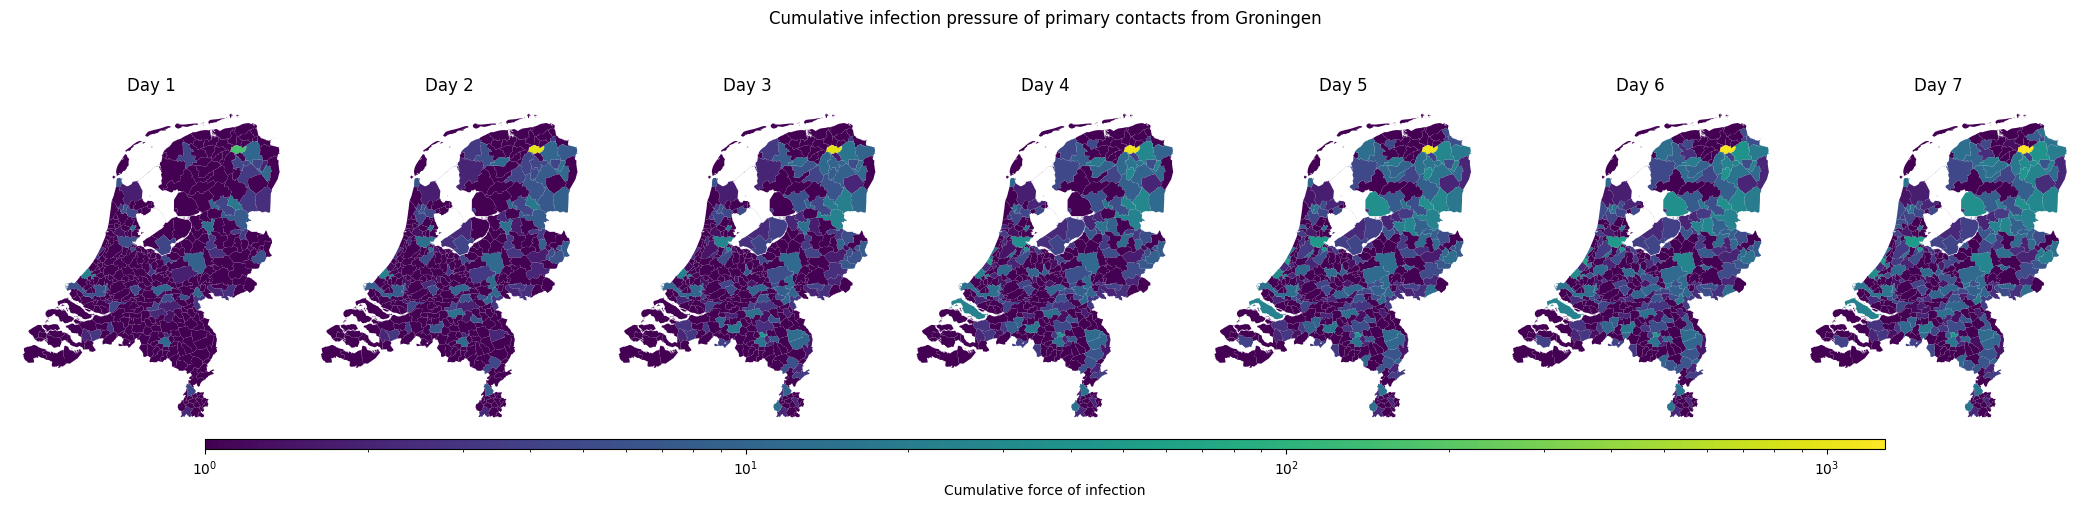

In [20]:
# CUMULATIVE INFECTIOIN PRESSURE OF PRIMARY CONTACTS
# Runs: 0 = Amsterdam, 1 = Heerde, 2 = Eindhoven, 3 = Groningen

import numpy as np
import os

seed = 5
runs = [0, 1, 2, 3]
labels = ['Amsterdam', 'Heerde', 'Eindhoven', 'Groningen']

title = 'Cumulative infection pressure of primary contacts from '

for run in runs:
    path = os.getcwd() + '/Data/Model_V1/Data/High/Seed_' + str(seed)
    foi_data_per_municipality = np.load(path + '/Runs_ref_3_3_5/Infection_Pressure_' + str(run) + '.npy')
    foi_data_per_municipality = foi_data_per_municipality + 1
    create_spatial_7plots(foi_data_per_municipality, title + labels[run], 'Cumulative force of infection')


C:\Users\Larsk\AppData\Local\Temp\ipykernel_6728\1150373992.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\Larsk\AppData\Local\Temp\ipykernel_6728\1150373992.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\Larsk\AppData\Local\Temp\ipykernel_6728\1150373992.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\Larsk\AppData\Local\Temp\ipykernel_6728\1150373992.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


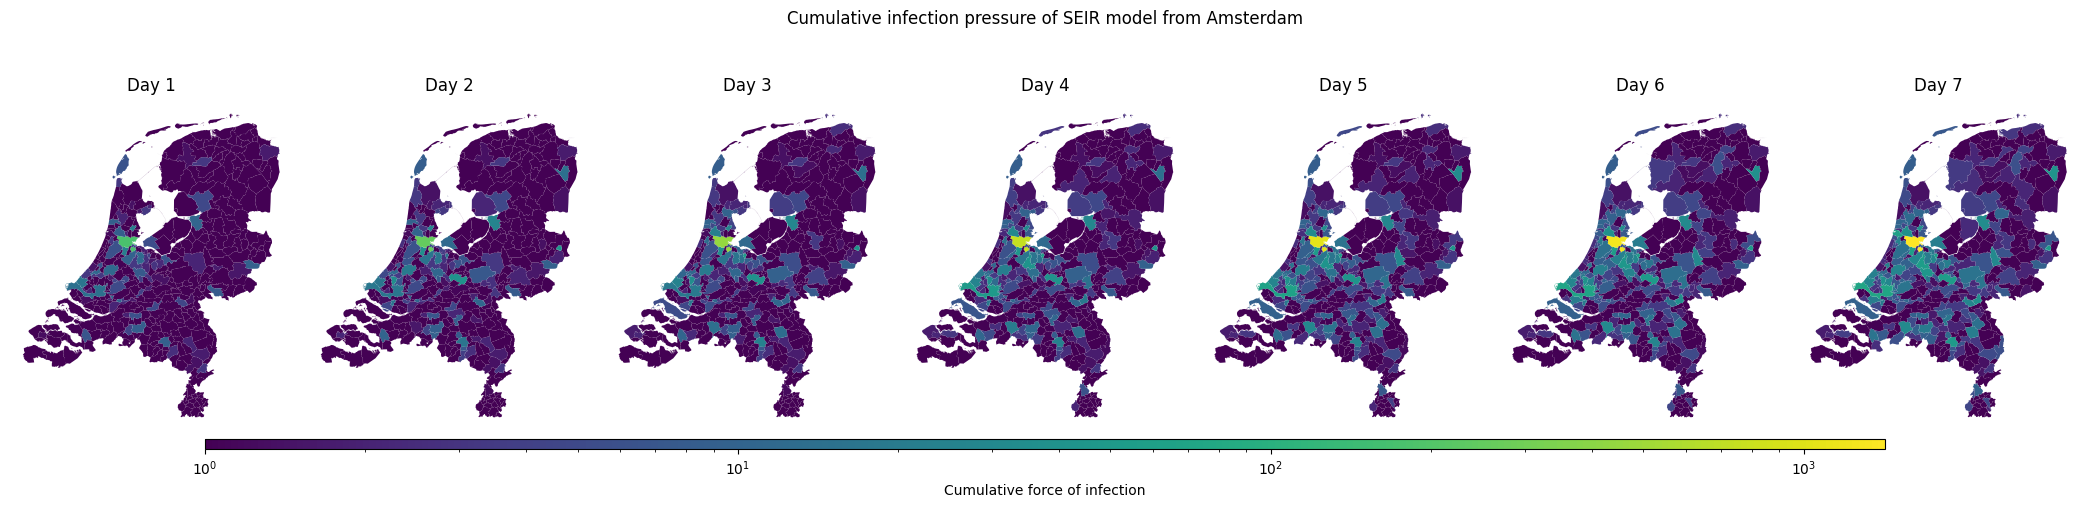

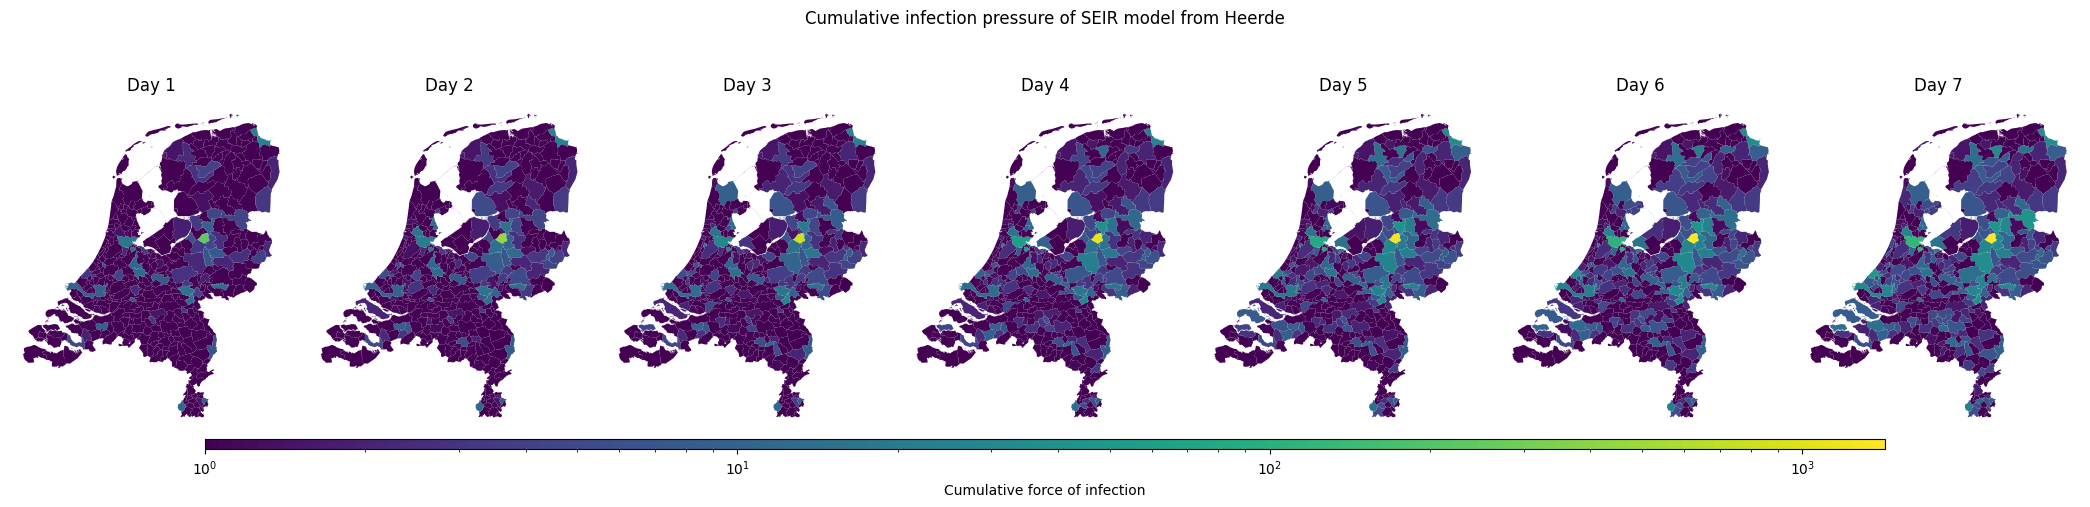

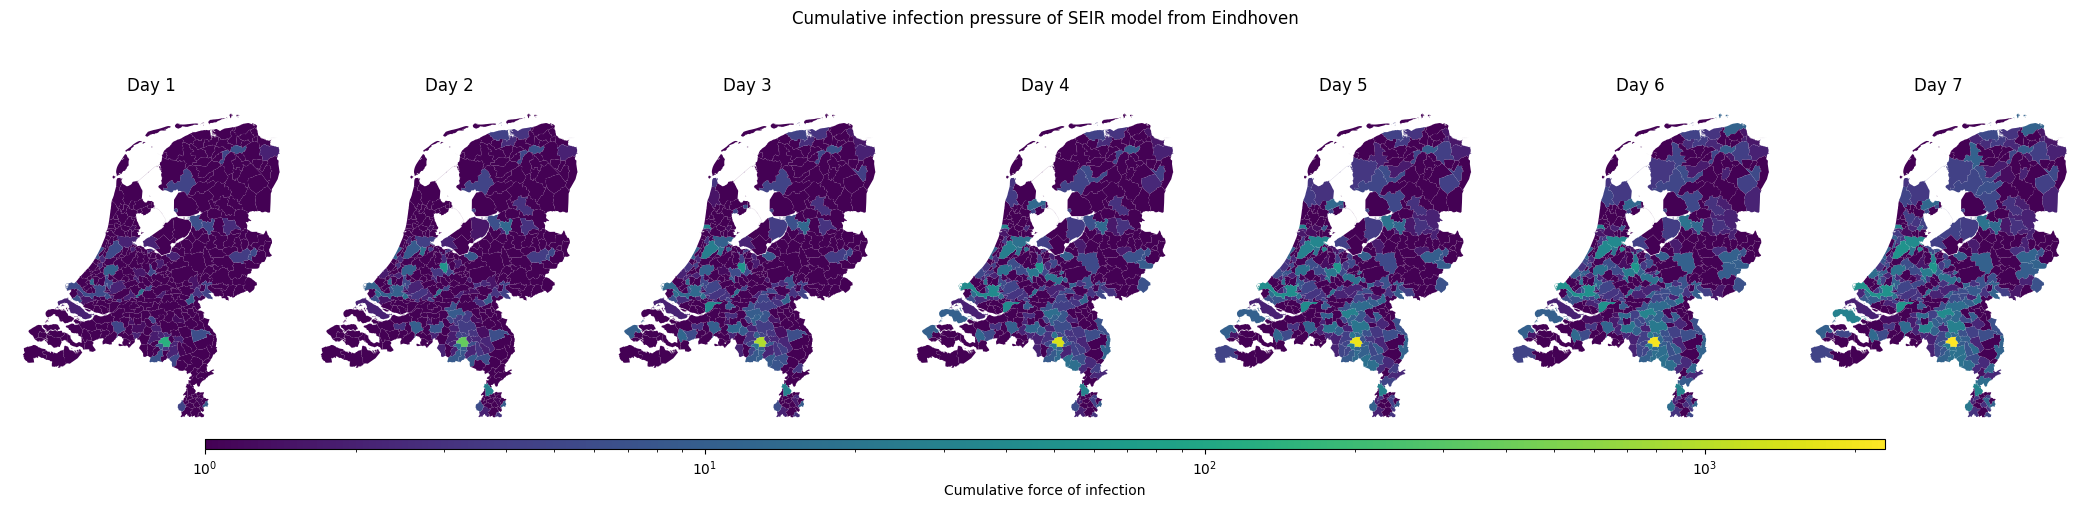

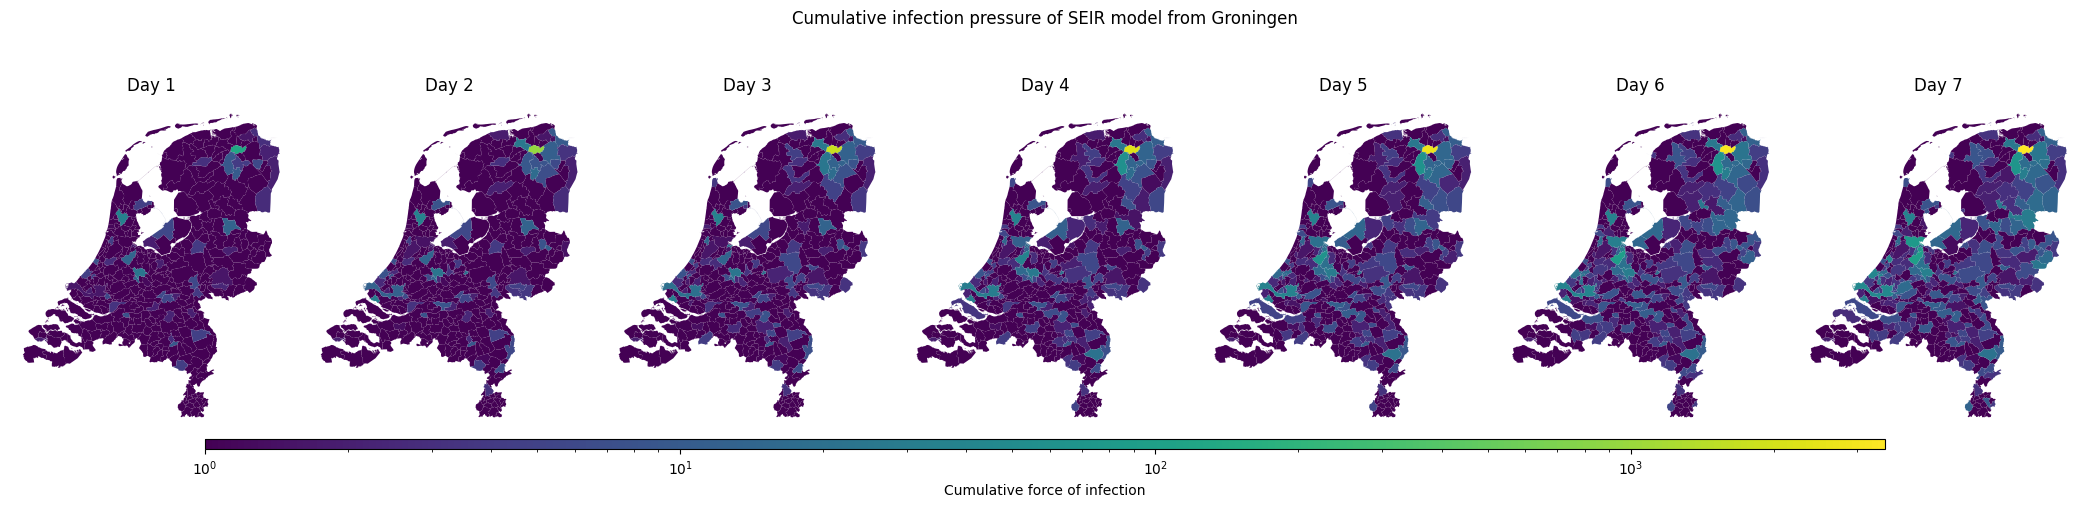

In [21]:
# CUMULATIVE INFECTIOIN PRESSURE OF WHOLE SEIR MODEL
# Runs: 0 = Amsterdam, 1 = Heerde, 2 = Eindhoven, 3 = Groningen

import numpy as np
import os

seed = 5
runs = [0, 1, 2, 3]
labels = ['Amsterdam', 'Heerde', 'Eindhoven', 'Groningen']

title = 'Cumulative infection pressure of SEIR model from '

for run in runs:
    path = os.getcwd() + '/Data/Model_V1/Data/High/Seed_' + str(seed)
    foi_data_per_municipality = np.load(path + '/Runs_ref_3_3_3/Infection_Pressure_' + str(run) + '.npy')
    foi_data_per_municipality = foi_data_per_municipality + 1
    create_spatial_7plots(foi_data_per_municipality, title + labels[run], 'Cumulative force of infection')


C:\Users\Larsk\AppData\Local\Temp\ipykernel_6728\1150373992.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\Larsk\AppData\Local\Temp\ipykernel_6728\1150373992.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\Larsk\AppData\Local\Temp\ipykernel_6728\1150373992.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\Larsk\AppData\Local\Temp\ipykernel_6728\1150373992.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


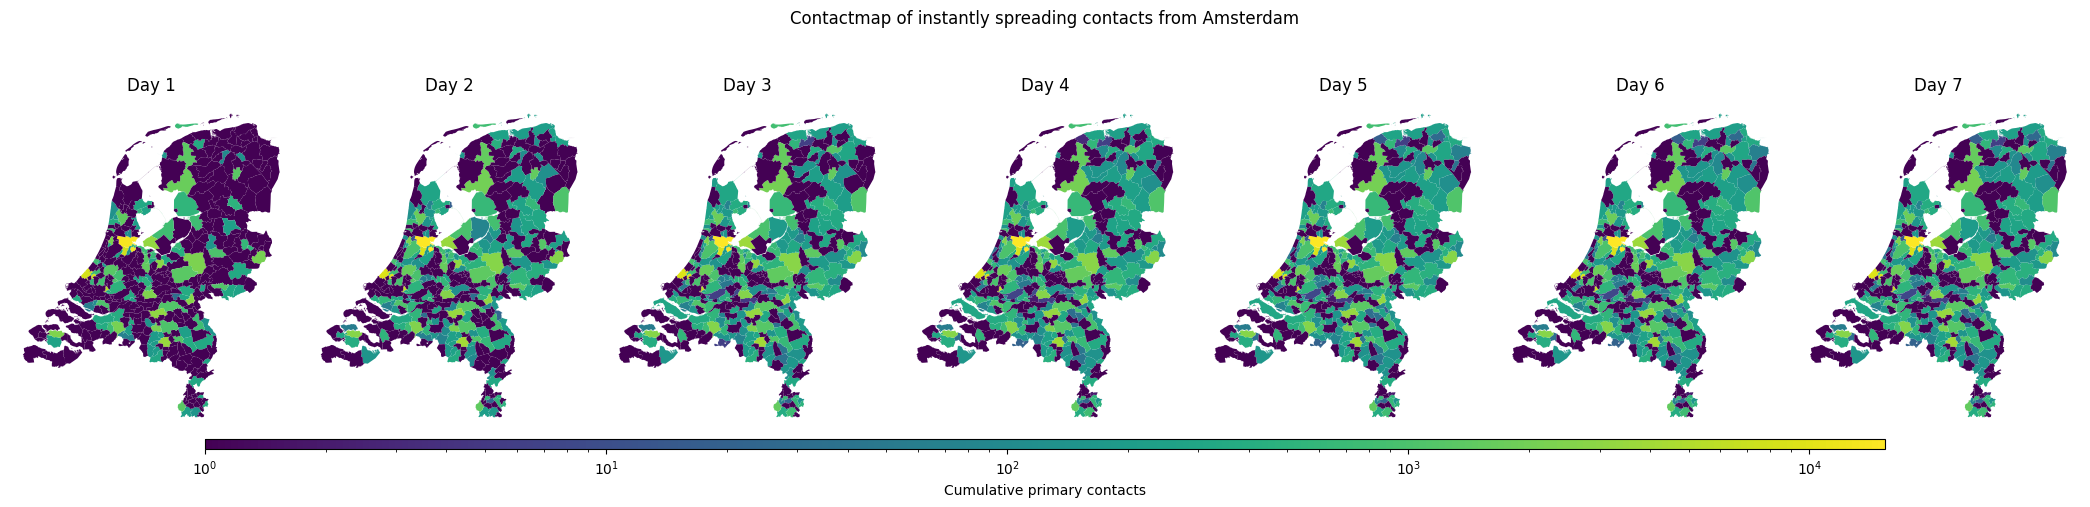

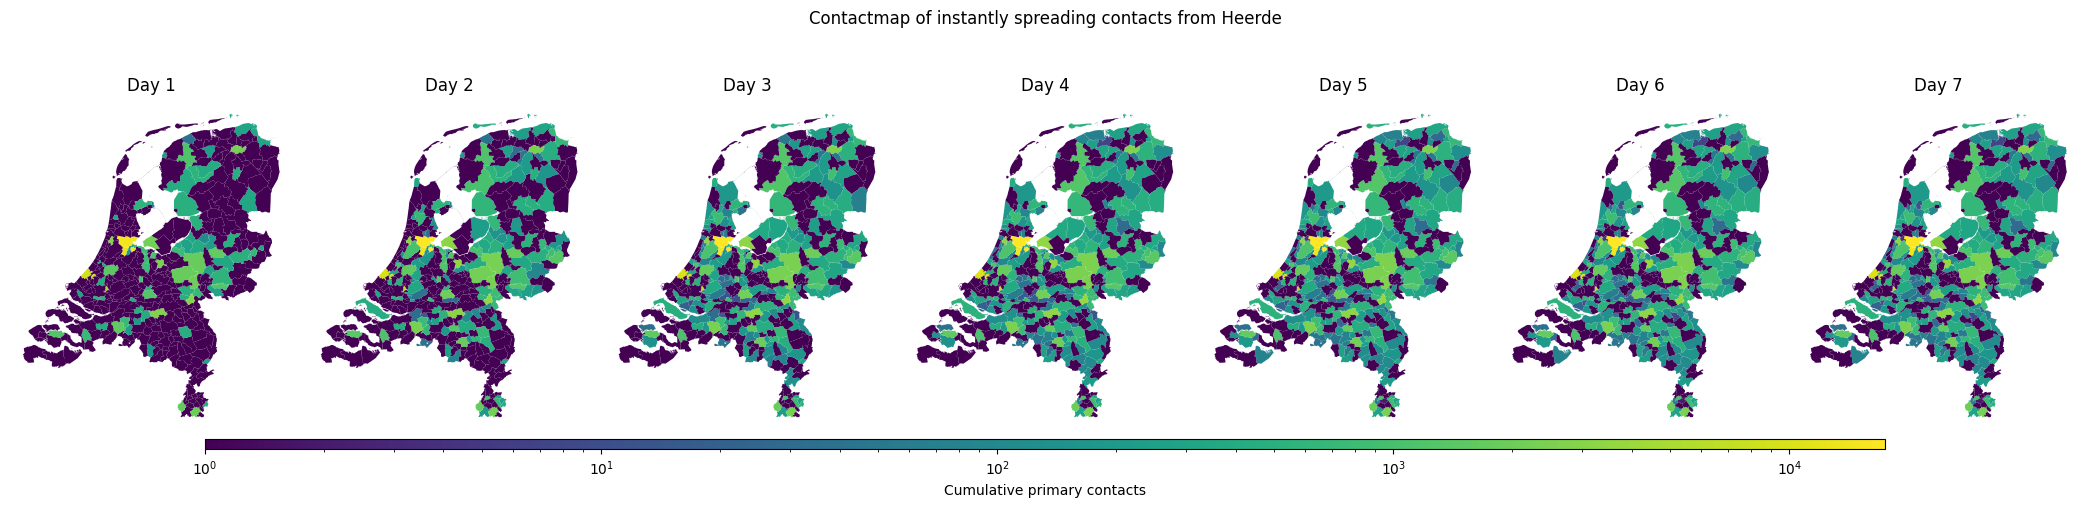

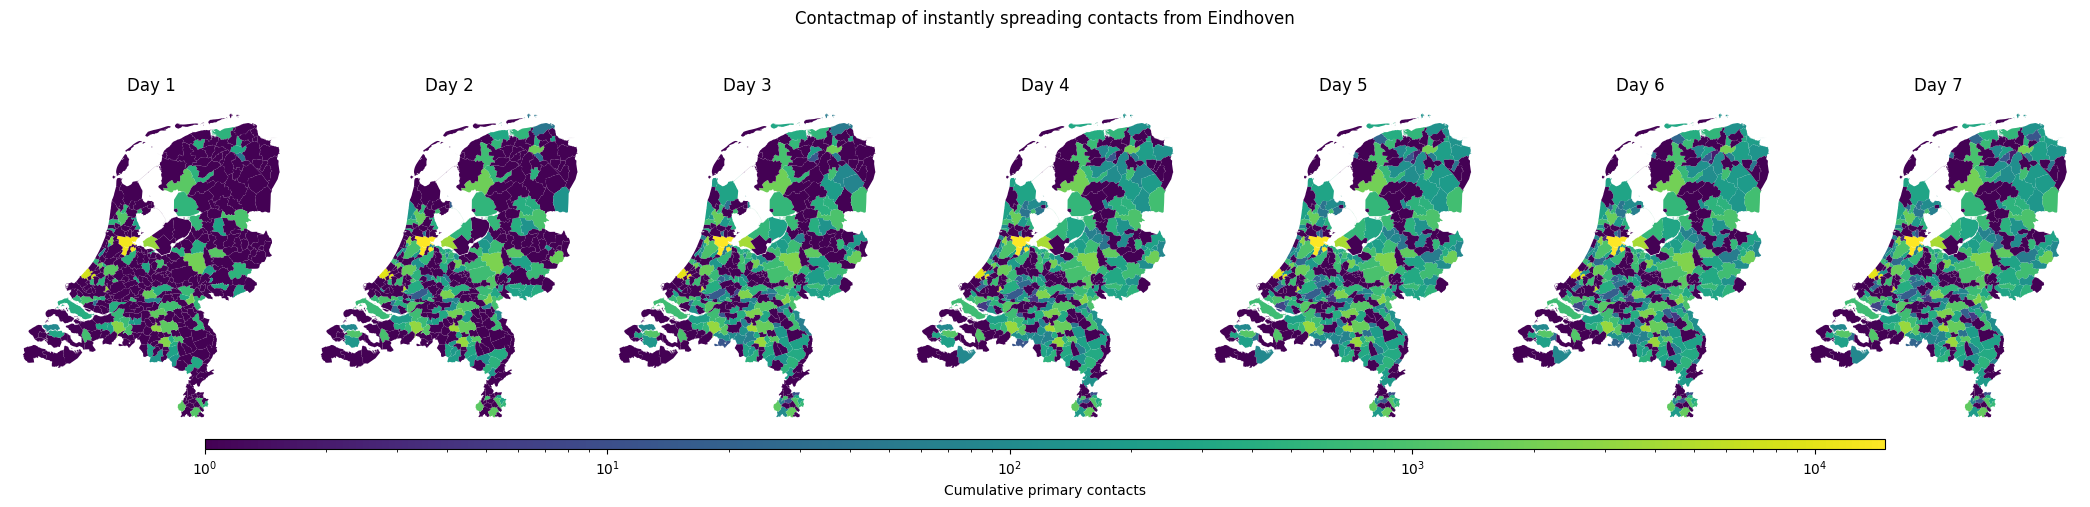

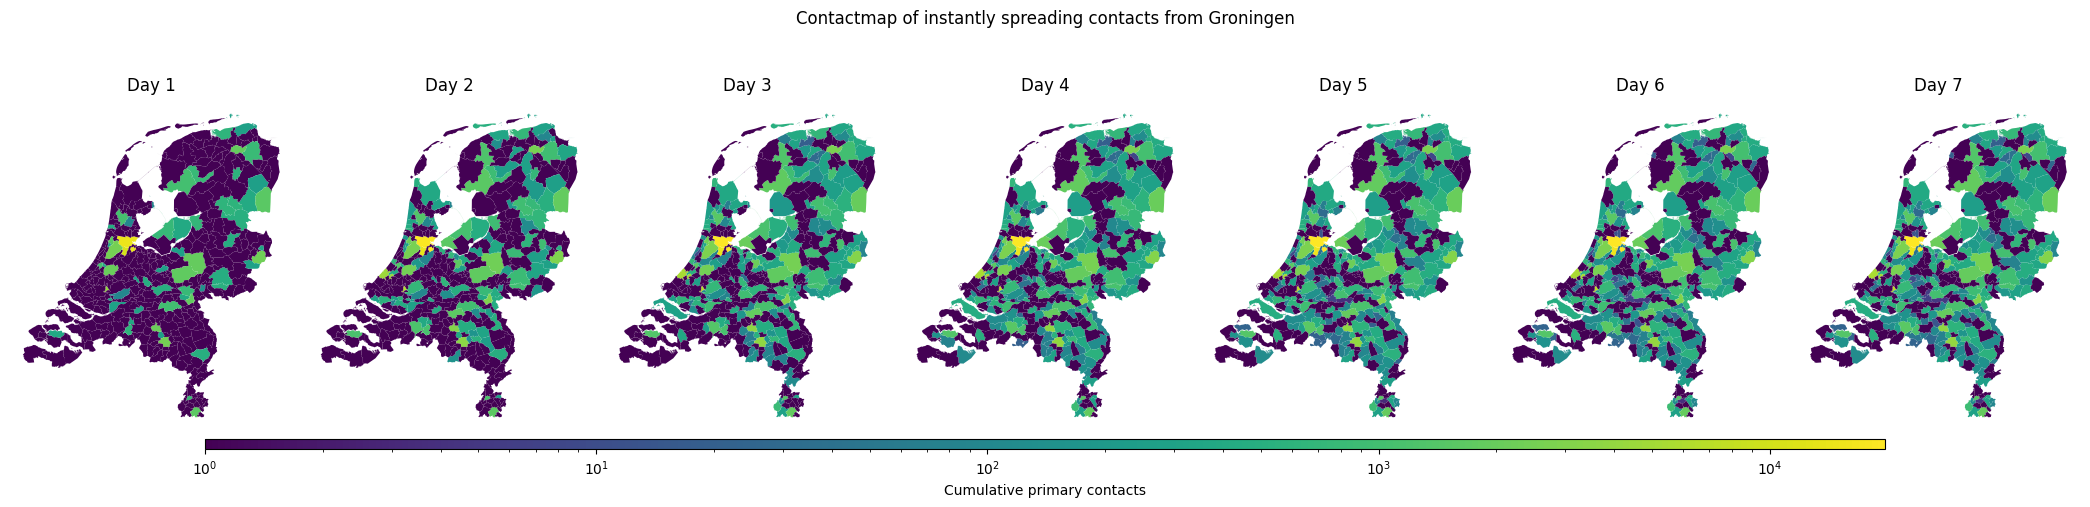

In [24]:
import numpy as np
import os

seed = 5
runs = [0, 1, 2, 3]
labels = ['Amsterdam', 'Heerde', 'Eindhoven', 'Groningen']

title = 'Cumulative infection pressure of SEIR model from '

for run in runs:
    path = os.getcwd() + '/Data/Model_V1/Data/High/Seed_' + str(seed)
    contact_data = np.load(path + '/Runs_ref_3_3_0/Contacts_per_agent_' + str(run) + '.npy')

    max_time = contact_data.shape[0]
    n_agents = contact_data.shape[1]

    # compute cumulative contacts per municipality per timestep
    municipality_contact_data = np.ones(shape=(max_time, 380))
    for t in range(1, max_time):
        for p in range(0, n_agents):
            if contact_data[t, p, 1] > 0:
                municipality_contact_data[t, contact_data[t, p, 0]] += 1

    create_spatial_7plots(municipality_contact_data, 'Contactmap of instantly spreading contacts from ' + labels[run], 'Cumulative primary contacts')

20530.0


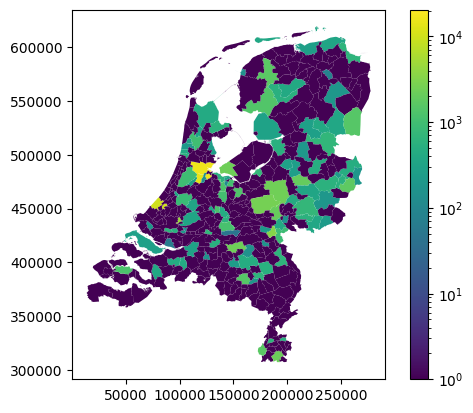

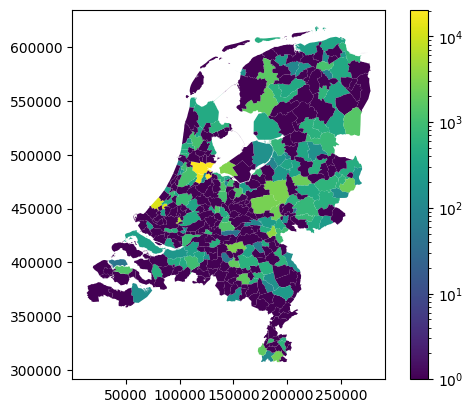

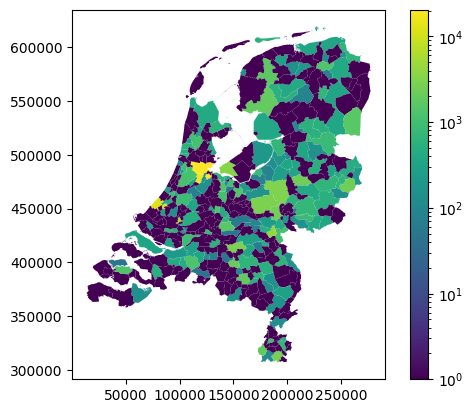

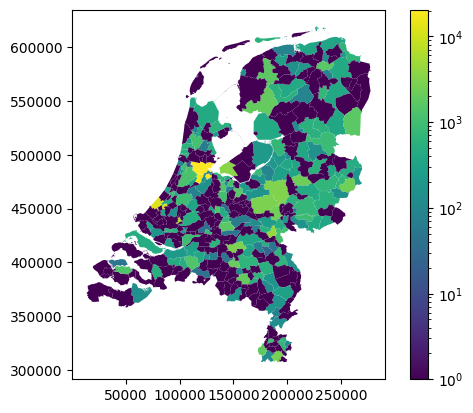

In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os

seed = 4
run = 8

path = os.getcwd() + '/Data/Model_V1/Data/High/Seed_' + str(seed)
contact_data = np.load(path + '/Runs_ref_3_3_5/Contacts_per_agent_' + str(run) + '.npy')

max_time = contact_data.shape[0]
n_agents = contact_data.shape[1]

# compute cumulative contacts per municipality per timestep
municipality_contact_data = np.ones(shape=(max_time, 380))
for t in range(1, max_time):
    for p in range(0, n_agents):
        if contact_data[t, p, 1] > 0:
            municipality_contact_data[t, contact_data[t, p, 0]] += 1


# plot the results

max_val = np.max(municipality_contact_data[max_time-1])
print(max_val)

mapdf = gpd.read_file('Data/NL-geomap/gemeente_2018_v3.shp')
mapdf = mapdf[mapdf["H2O"] == "NEE"]
mapdf.sort_values("GM_NAAM", inplace=True)
mapdf = mapdf.reset_index(drop=True)

mapdf.insert(0, 'CONTACTS_QUARTER', municipality_contact_data[int(max_time/4)])
mapdf.insert(0, 'CONTACTS_HALF', municipality_contact_data[int(max_time/2)])
mapdf.insert(0, 'CONTACTS_3QUARTER', municipality_contact_data[int(max_time*3/4)])
mapdf.insert(0, 'CONTACTS_MAXTIME', municipality_contact_data[max_time-1])

mapdf.plot(column="CONTACTS_QUARTER", legend=True, norm=matplotlib.colors.LogNorm(1,max_val))
mapdf.plot(column="CONTACTS_HALF", legend=True, norm=matplotlib.colors.LogNorm(1,max_val))
mapdf.plot(column="CONTACTS_3QUARTER", legend=True, norm=matplotlib.colors.LogNorm(1,max_val))
mapdf.plot(column="CONTACTS_MAXTIME", legend=True, norm=matplotlib.colors.LogNorm(1,max_val))

plt.show()
